In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving dataset_new.csv to dataset_new.csv


In [ ]:
import re #import regular expression
import string 
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer

englishStemmer = SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

import math

import numpy as np

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from collections import Counter


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

import pandas as pd
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from IPython.display import display
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob

In [ ]:
df = pd.read_csv('dataset_new.csv',encoding='ISO-8859-1')
df.head()

,id,label,data
0,0,racism,I just a way to HATE white people. Shouldnt c...
1,1,racism,we should not conflate islamic extremism with ...
2,2,racism,us refuses to veto resolution on #israel #zion...
3,3,racism,that hammock just attempted #whitegenocide #li...
4,4,racism,bringing back morals #obama #dividerofanation


In [ ]:
def remove_stopwords(text):
    stopWords = stopwords.words('english')
    not_stopword = [word for word in text if not word in stopWords]
    return not_stopword

def clean_str(string):

  string = str(string).lower()

  # define punctuation
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

  # remove punctuation from the string
  no_punct = ""
  for char in string:
    if char not in punctuations:
        no_punct = no_punct + char

  string = no_punct  

  re.sub(r'[^A-Za-z0-9 ]+', '', string)
  string = re.sub(r"\r", "", string) 
  #string = re.sub(r"[0-9]", "digit", string)
  string = re.sub(r"\'", "", string)    
  string = re.sub(r"\"", "", string) 
  string = re.sub(r"\d+" , "", string)
  # remove html markup
  string = re.sub("(<.*?>)","", string)
    
  #remove non-ascii and digits
  string = re.sub("(\\W|\\d)"," ", string)

  string = string.strip() #white spaces

  string = re.sub(r"what's", "what is ", string)
  string = re.sub(r"\'s", " ", string)
  string = re.sub(r"\'ve", " have ", string)
  string = re.sub(r"can't", "can not ", string)
  string = re.sub(r"n't", " not ", string)
  string = re.sub(r"i'm", "i am ", string)
  string = re.sub(r"\'re", " are ", string)
  string = re.sub(r"\'d", " would ", string)
  string = re.sub(r"\'ll", " will ", string)
  string = re.sub(r"\'scuse", " excuse ", string)
  
    
  #remove non word

  string = re.sub('\W', ' ', string)

  #for one or more spaces

  string = re.sub('\s+', ' ', string)
  string = string.strip(' ')

  #string tokenization

  tokens_by_word = ''
  tokens_by_word = word_tokenize(string)

  string = tokens_by_word

  #remove stopwords
  result = remove_stopwords(string)
  string = result


  #stemming
  words = [word for word in string if word.isalpha()]
  stemmed = [englishStemmer.stem(word) for word in string]
  string = stemmed

  #lematization

  lemmatized = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in string]
  
  string = ' '.join(lemmatized)

  
 
#  string = TextBlob(string)

  return string

df['data'] = df['data'].map(lambda com : clean_str(com))
df['data']

0                  way hate white peopl shouldnt cuz live
1                            conflat islam extrem terrori
2       us refus veto resolut israel zionism illegalsettl
3       hammock attempt whitegenocid lie tinfoilhat fa...
4                      bring back moral obama dividerofan
                              ...                        
2297    stay bang smoker smoke way toilet whenev pass ...
2298     friend school teas bull sing make feel uncomfort
2299                                    harass boss offic
2300    friend talk say one street pull skirt run towa...
2301                       guy whistl call name near work
Name: data, Length: 2302, dtype: object

In [ ]:
col = ['label', 'data']
df = df[col]
df = df[pd.notnull(df['data'])]

df.columns = ['label', 'data']
df['clss'] = df['label'].factorize()[0]

print(df['clss'])
category_id_df = df[['label', 'clss']].drop_duplicates().sort_values('clss')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['clss', 'label']].values)

0       0
1       0
2       0
3       0
4       0
       ..
2297    3
2298    3
2299    3
2300    3
2301    3
Name: clss, Length: 2302, dtype: int64


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='utf-8', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.data).toarray()
labels = df.clss
features.shape

(2302, 3536)

In [ ]:
#N = 2
#for Product, category_id in sorted(category_to_id.items()):
#  features_chi2 = chi2(features, labels == category_id)
#  indices = np.argsort(features_chi2[0])
#  feature_names = np.array(tfidf.get_feature_names())[indices]
#  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#  print("# '{}':".format(Product))
#  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

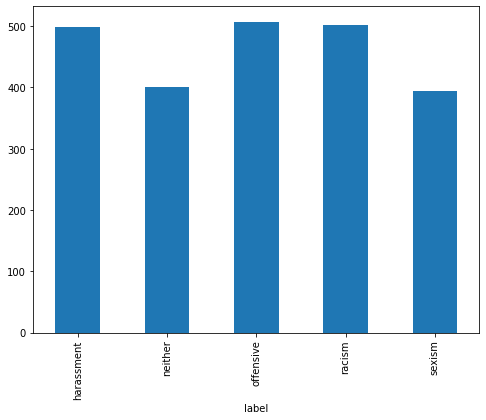

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('label').data.count().plot.bar(ylim=0)
plt.show()

In [ ]:
#Prepare Model:

model2 = LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=10)

size_of_test_data = 0.30
num_of_RS = 42

X_train, X_test, y_train, y_test = train_test_split(df['data'], df['label'],test_size = size_of_test_data ,random_state = num_of_RS)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer(sublinear_tf=True, norm='l2', use_idf=True, smooth_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

SVC = model2.fit(X_train_tfidf, y_train)


[LibLinear]

In [ ]:
model2

LinearSVC(C=0.1, random_state=42, verbose=10)

In [ ]:
print(SVC.predict(count_vect.transform(["i will hit you"])))

['harassment']


In [ ]:
#print(SVC.predict(count_vect.transform(["I hate black people"])))
print('Input: I hate black people: ')
print('This sentence is abusive: \nIts type is: ')
print(SVC.predict(count_vect.transform(["I hate black people"])))




Input: I hate black people: 
This sentence is abusive: 
Its type is: 
['racism']


In [ ]:
print(SVC.predict(count_vect.transform(["have a good day"])))

['neither']


In [ ]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size = size_of_test_data, random_state = num_of_RS)

In [ ]:
from sklearn.metrics import accuracy_score

[LibLinear]confusion matrix of Linear SVC is: 


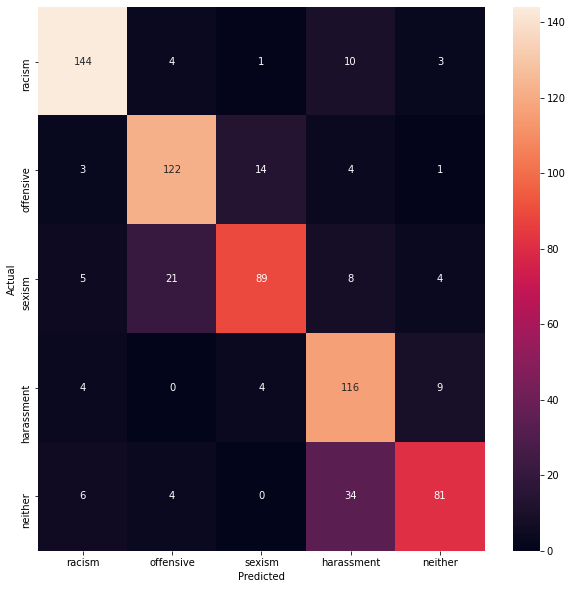

In [ ]:
model =  model2
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ac1 = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print("confusion matrix of Linear SVC is: ")
plt.show()

In [ ]:
print("accuracy of Linear SVC is: ",ac1)

accuracy of Linear SVC is:  0.7988422575976846


In [ ]:
print("Classification Report Linear SVC is: ")
print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))

Classification Report Linear SVC is: 
              precision    recall  f1-score   support

      racism       0.89      0.89      0.89       162
   offensive       0.81      0.85      0.83       144
      sexism       0.82      0.70      0.76       127
  harassment       0.67      0.87      0.76       133
     neither       0.83      0.65      0.73       125

    accuracy                           0.80       691
   macro avg       0.80      0.79      0.79       691
weighted avg       0.81      0.80      0.80       691



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 394 members, which is less than n_splits=500.
  % (min_groups, self.n_splits)), UserWarning)


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

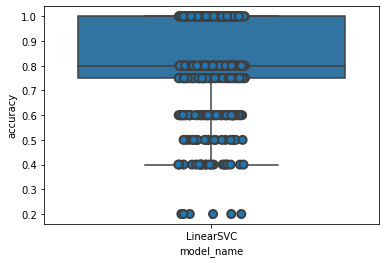

In [ ]:
models = [
    model2,
]
CV = 500

cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [ ]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC    0.7913
Name: accuracy, dtype: float64

In [ ]:
from IPython.display import display
for predicted in category_id_df.clss:
  for actual in category_id_df.clss:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['label', 'data']])
      print('')

'sexism' predicted as 'offensive' : 21 examples.


,label,data
962,sexism,want make pussi raw cum face your dirti bitch ...
618,sexism,dumb ass bitch hahah
247,sexism,fuck suck shes stiff stage half time dont actu...
668,sexism,silver leagu complet fuckingg shit
647,sexism,repli call fuck rude hater
1004,sexism,see show see hoe wasnt hot would thick
613,sexism,yup id cuff heart beat fan sexi lil ass damn fine
282,sexism,bad shes wan na nigger nigger fucker
986,sexism,suck dat bitch dont yall eva believ color man ...
233,sexism,dis noth porn



'offensive' predicted as 'sexism' : 14 examples.


,label,data
555,offensive,ifwed eat da pussi better lesbian
554,offensive,ifthepurgewasr id best prostitut madam ever he...
188,offensive,thenymphotweet hicki thigh right pussi gtgtgt ...
1613,offensive,amillinati bro like realli enjoy like eat puss...
527,offensive,pull pussi dodg collect panti alright stormi jake
1564,offensive,rt ariluvsal nicca yall need live money pussi ...
135,offensive,post pictur pussi
177,offensive,chill sexi scalli lad
1602,offensive,adamrott watch prust tri hit hank break play h...
1689,offensive,danger woman youuuuu hahahahahahahahahahahahah...



'racism' predicted as 'harassment' : 10 examples.


,label,data
450,racism,disgust grandmoth grandson exist alreadi
1892,racism,blacklivesmatt that bilal call adhan kaaba alw...
1865,racism,bodi skiney
438,racism,gop fail antimor platform
1900,racism,cheap thing suit
49,racism,rebelsci use actual woman genet engin lab natu...
1949,racism,israel rape land freedom palestin
1251,racism,societi overcom possibl end racism happen one ...
1838,racism,skin tone wildish
1864,racism,pure today cologn everybodi look arab kettl fe...



'neither' predicted as 'harassment' : 34 examples.


,label,data
1111,neither,omg churner feel like razor blade hand oh wait
1131,neither,where hat go
2013,neither,hey guy tommorow last day exam im happi yay
2089,neither,gorgeous iam posit affirm
1124,neither,cant stand kat andr
2036,neither,hi hi hurray u get well
2018,neither,hey good mood feel
1299,neither,student like coffe
2093,neither,want becom turist
1509,neither,genuin interest question cours answer predict ...
